<a href="https://colab.research.google.com/github/linyunhe/apple_case_study/blob/main/apple_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import zipfile
import os

# Unzip to /content/apple_case_study
zip_path = "/content/drive/MyDrive/squares.zip"
extract_path = "/content/apple_case_study"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Done：", extract_path)


Done： /content/apple_case_study


In [16]:
import os
for root, dirs, files in os.walk("/content/apple_case_study"):
    print(root, "files:", dirs, "count:", len(files))

/content/apple_case_study files: ['__MACOSX', 'squares'] count: 0
/content/apple_case_study/__MACOSX files: ['squares'] count: 0
/content/apple_case_study/__MACOSX/squares files: ['train', 'val'] count: 3
/content/apple_case_study/__MACOSX/squares/train files: ['b', 'a', 'c'] count: 4
/content/apple_case_study/__MACOSX/squares/train/b files: [] count: 501
/content/apple_case_study/__MACOSX/squares/train/a files: [] count: 501
/content/apple_case_study/__MACOSX/squares/train/c files: [] count: 500
/content/apple_case_study/__MACOSX/squares/val files: ['b', 'a', 'c'] count: 4
/content/apple_case_study/__MACOSX/squares/val/b files: [] count: 500
/content/apple_case_study/__MACOSX/squares/val/a files: [] count: 500
/content/apple_case_study/__MACOSX/squares/val/c files: [] count: 500
/content/apple_case_study/squares files: ['train', 'val'] count: 1
/content/apple_case_study/squares/train files: ['b', 'a', 'c'] count: 1
/content/apple_case_study/squares/train/b files: [] count: 501
/conten

# Image Preprocessing

In [18]:
import tensorflow as tf

# Fix image size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Load training data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/apple_case_study/squares/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'  # one-hot output
)

# 加载测试集
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/apple_case_study/squares/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)


Found 1500 files belonging to 3 classes.
Found 1500 files belonging to 3 classes.


In [19]:
for images, labels in train_ds.take(1):
    print("image size:", images.shape)  # (batch_size, height, width, channels)
    print("image type:", images.dtype)


image size: (32, 224, 224, 3)
image type: <dtype: 'float32'>


In [20]:
for images, labels in test_ds.take(1):
    print("image size:", images.shape)  # (batch_size, height, width, channels)
    print("image type:", images.dtype)


image size: (32, 224, 224, 3)
image type: <dtype: 'float32'>


In [21]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])


# Model sequence (convNet)

In [22]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),  # normalization

    data_augmentation,  # data augmentation

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # three class categories
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.3615 - loss: 3.6025 - val_accuracy: 0.6613 - val_loss: 0.7558
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.6887 - loss: 0.8588 - val_accuracy: 0.7753 - val_loss: 0.6832
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.8438 - loss: 0.5952 - val_accuracy: 0.8020 - val_loss: 0.5128
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 178s 4s/step - accuracy: 0.8610 - loss: 0.5719 - val_accuracy: 0.8947 - val_loss: 0.2806
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.9086 - loss: 0.2562 - val_accuracy: 0.9393 - val_loss: 0.1943
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.9529 - loss: 0.1416 - val_accuracy: 0.9487 - val_loss: 0.2442
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.9695 - loss: 0.1119 - val_accuracy: 0.8993 - val_loss: 0.3892
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.9699 - loss: 0.0872 - val_accuracy: 0.9293 - v

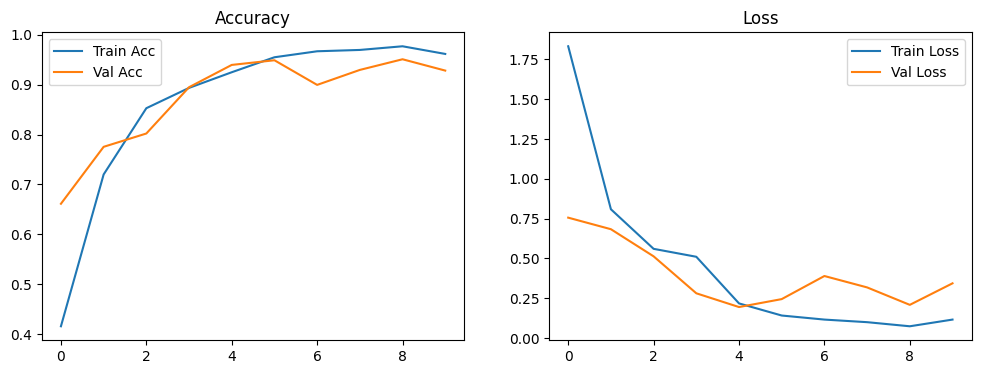

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [25]:
model.save('conv_v1.h5')  # save model


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 178s 4s/step - accuracy: 0.9719 - loss: 0.0845 - val_accuracy: 0.9647 - val_loss: 0.1177
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 196s 4s/step - accuracy: 0.9667 - loss: 0.1174 - val_accuracy: 0.9653 - val_loss: 0.1496
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.9794 - loss: 0.0728 - val_accuracy: 0.9627 - val_loss: 0.1509
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.9750 - loss: 0.0978 - val_accuracy: 0.8987 - val_loss: 0.4065
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.9661 - loss: 0.1169 - val_accuracy: 0.9747 - val_loss: 0.1272
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 180s 4s/step - accuracy: 0.9862 - loss: 0.0502 - val_accuracy: 0.9753 - val_loss: 0.1100
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 178s 4s/step - accuracy: 0.9830 - loss: 0.0758 - val_accuracy: 0.9013 - val_loss: 0.3476
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.9715 - loss: 0.0769 - val_accuracy: 0.9740 - v

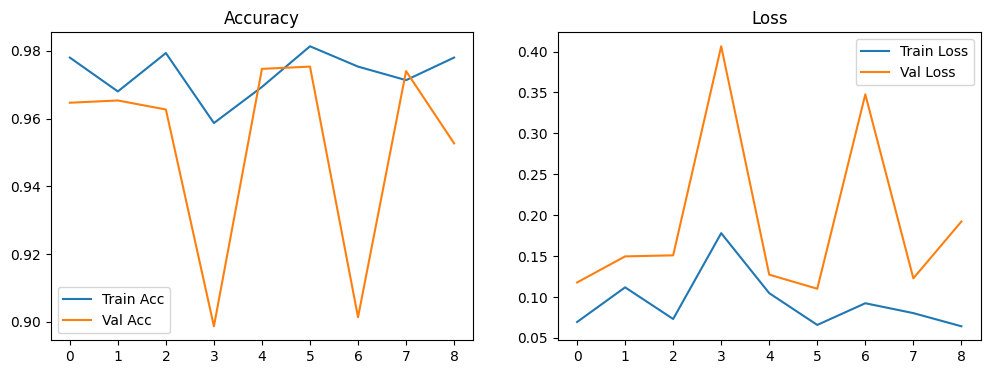

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [29]:
from tensorflow.keras.models import load_model

model = load_model('conv_v1.h5')


In [30]:
import numpy as np
from sklearn.metrics import classification_report
import tensorflow as tf

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

class_names = test_ds.class_names

report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
1

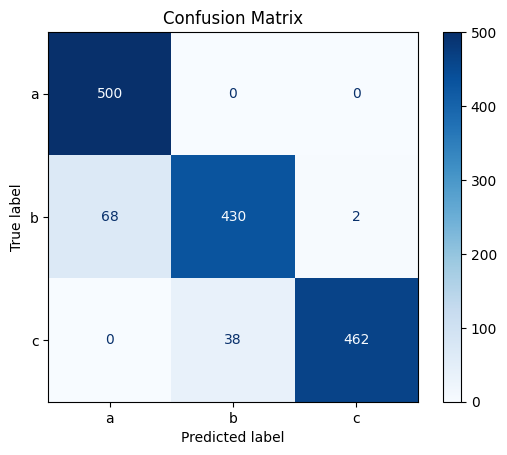

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step


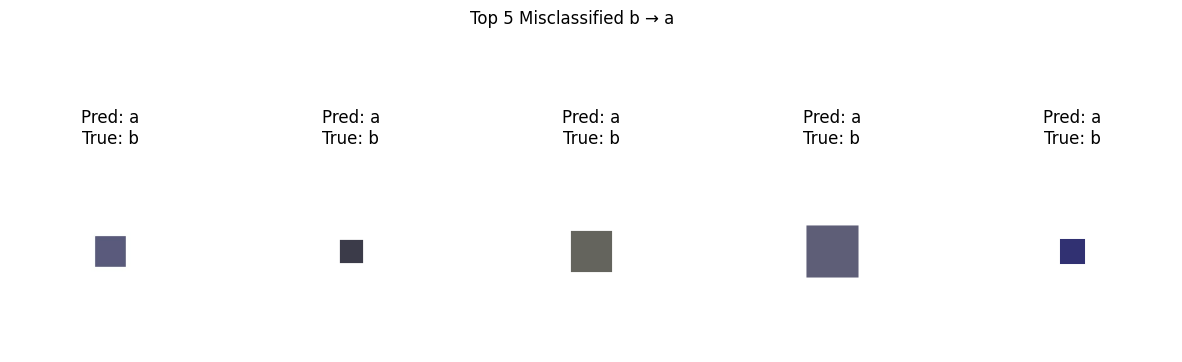

In [32]:
import matplotlib.pyplot as plt

test_images = []
test_labels = []

for images, labels in test_ds:
    test_images.extend(images)
    test_labels.extend(labels.numpy())

preds = model.predict(tf.stack(test_images))
pred_labels = tf.argmax(preds, axis=1).numpy()
true_labels = tf.argmax(test_labels, axis=1)

wrong_idx = [i for i, (t, p) in enumerate(zip(true_labels, pred_labels)) if t == 1 and p == 0]

# visualization the top 5
plt.figure(figsize=(15, 5))
for i, idx in enumerate(wrong_idx[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[idx].numpy().astype("uint8"))
    plt.axis('off')
    plt.title(f"Pred: a\nTrue: b")
plt.suptitle("Top 5 Misclassified b → a")
plt.show()


Summary
This model has achieved high accuracy with recall and precision both in the 92–95% range (especially for class c), and most of the misclassifications (b misclassified as a) are concentrated in images with very low information content. In real-world scenarios, this often falls into the category of "even humans would struggle to tell them apart," so further aggressive optimization is not recommended.


Potential next steps:

If class b consists of multiple underlying subtypes, consider splitting it into finer-grained labels or re-annotating the data accordingly.




The current model has already learned what it should learn — it's not undertrained, it's just meeting natural limits.









